In [3]:
#podłączenie dysku Google
import os
from google.colab import drive

drive.mount('/content/drive')

#wskazanie ścieżki do projektu
os.chdir('/content/drive/My Drive/WdSI_projekt')

Mounted at /content/drive


In [4]:
#instalacja biblioteki Detecto
!pip install detecto

In [6]:
#import funkcji z biblioteki Detecto
from detecto import core, utils, visualize

In [ ]:
#podanie ścieżki treningowej oraz słów kluczowych
dataset_train = core.Dataset('train/annotations/', 'train/images/')
model = core.Model(['speedlimit', 'crosswalk', 'stop', 'trafficlight'])

#trenowanie zbioru
model.fit(dataset_train, epochs=10)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


In [ ]:
#zachowanie modelu sieci
model.save('model_weights.pth')

In [7]:
#wczytanie modelu sieci
model = core.Model.load('model_weights.pth', ['speedlimit', 'crosswalk', 'stop', 'trafficlight'])

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


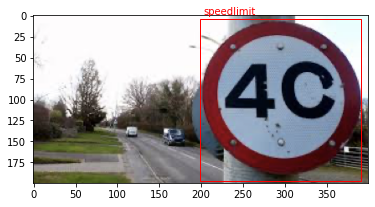

['speedlimit']
tensor([[198.1015,   3.7300, 391.1602, 196.8159]])
tensor([0.9977])


In [8]:
#wywołanie obrazu ze zbioru treningowego celem sprawdzenia możliwości oznaczenia znaków
image_train = utils.read_image('train/images/road101.png')
predictions_train = model.predict(image_train)

labels_train, boxes_train, scores_train = predictions_train

import numpy as np

#filtracja wyników
train_filter = np.where(scores_train > 0.9)
scores_train_filter = scores_train[train_filter]
boxes_train_filter = boxes_train[train_filter]
num_list_train = list(train_filter[0])
labels_train_filter = []

for i in num_list_train:
  labels_train_filter.append(labels_train[i])
  
#wyplotowanie obrazu, rozpoznanie typu, podanie współrzędnych oraz prawdopodobieństwa
visualize.show_labeled_image(image_train, boxes_train_filter, labels_train_filter)
print(labels_train_filter)
print(boxes_train_filter)
print(scores_train_filter)

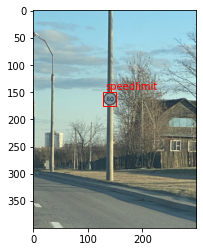

['speedlimit']
tensor([[127.2357, 150.5556, 152.5849, 175.0482]])
tensor([0.9993])


In [9]:
#wywołanie obrazu ze zbioru testowego celem sprawdzenia możliwości oznaczenia znaków
image_test = utils.read_image('test/images/road859.png')
predictions_test = model.predict(image_test)

labels_test, boxes_test, scores_test = predictions_test

#filtracja wyników
test_filter = np.where(scores_test > 0.9)
scores_test_filter = scores_test[test_filter]
boxes_test_filter = boxes_test[test_filter]
num_list_test = list(test_filter[0])
labels_test_filter = []

for j in num_list_test:
  labels_test_filter.append(labels_test[j])
  
#wyplotowanie obrazu, rozpoznanie typu, podanie współrzędnych oraz prawdopodobieństwa
visualize.show_labeled_image(image_test, boxes_test_filter, labels_test_filter)
print(labels_test_filter)
print(boxes_test_filter)
print(scores_test_filter)

In [14]:
def detect():
    # detekcja znakow ograniczenia predkosci
    for detection in os.listdir('test/images'):
        image_detect = utils.read_image('test/images/'+detection)
        predictions_detect = model.predict(image_detect)

        labels_detect, boxes_detect, scores_detect = predictions_detect

        # filtracja wynikow
        detect_filter = np.where(scores_detect > 0.9)
        scores_detect_filter = scores_detect[detect_filter]
        boxes_detect_filter = boxes_detect[detect_filter]
        num_list_detect = list(detect_filter[0])
        labels_detect_filter = []

        for k in num_list_detect:
            labels_detect_filter.append(labels_detect[k])

        # wyplotowanie obrazu, rozpoznanie typu, podanie wspolrzednych oraz prawdopodobienstwa
        print(labels_detect_filter)
        print(boxes_detect_filter)
        print(scores_detect_filter)
        #visualize.show_labeled_image(image_test, boxes_test_filter, labels_test_filter)

In [15]:
x = input()
if x == "detect":
    detect()

detect
['speedlimit', 'crosswalk']
tensor([[138.9156, 249.6841, 177.5774, 287.8441],
        [  0.7507, 270.9692,  21.5576, 291.1139]])
tensor([0.9994, 0.9779])
['speedlimit']
tensor([[116.1339, 217.6993, 192.0868, 295.7832]])
tensor([0.9985])
['speedlimit']
tensor([[ 58.3163, 269.9020, 165.9196, 376.2062]])
tensor([0.9992])
['speedlimit']
tensor([[ 85.7291, 204.4971, 140.3848, 258.6820]])
tensor([0.9990])
['speedlimit']
tensor([[135.8653, 178.1510, 175.9030, 222.3898]])
tensor([0.9992])
['speedlimit']
tensor([[142.7524, 187.0021, 177.1001, 224.5824]])
tensor([0.9990])
['speedlimit']
tensor([[ 85.5824, 192.0338, 169.1303, 273.0136]])
tensor([0.9993])
['speedlimit']
tensor([[102.9864, 214.1333, 160.5974, 271.9623]])
tensor([0.9992])
['speedlimit']
tensor([[183.1048, 163.0852, 215.3707, 197.7441]])
tensor([0.9992])
['crosswalk', 'speedlimit']
tensor([[  8.6919, 190.2020,  47.4725, 228.2430],
        [163.9688, 190.1362, 213.9676, 241.0352]])
tensor([0.9989, 0.9989])
['stop']
tensor([[156